In [114]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
#fetching the dataset
df=pd.read_csv("goalscorers.csv")
df.head()


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,02-07-1916,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,02-07-1916,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,02-07-1916,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,02-07-1916,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,06-07-1916,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [116]:
df.shape

(44335, 8)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44335 entries, 0 to 44334
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44335 non-null  object 
 1   home_team  44335 non-null  object 
 2   away_team  44335 non-null  object 
 3   team       44335 non-null  object 
 4   scorer     44286 non-null  object 
 5   minute     44076 non-null  float64
 6   own_goal   44335 non-null  bool   
 7   penalty    44335 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


* minute and scorer have some null values

In [118]:
df.describe()

,minute
count,44076.000000
mean,50.012478
std,26.354402
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [119]:
#checking null  values percentage.
round(100*(df.isnull().sum()/len(df.index)), 2)

date         0.00
home_team    0.00
away_team    0.00
team         0.00
scorer       0.11
minute       0.58
own_goal     0.00
penalty      0.00
dtype: float64

In [120]:
# deleting the entries having null values
df=df.dropna()

In [121]:
round(100*(df.isnull().sum()/len(df.index)), 2)

date         0.0
home_team    0.0
away_team    0.0
team         0.0
scorer       0.0
minute       0.0
own_goal     0.0
penalty      0.0
dtype: float64

In [122]:
(100 - 100*(len(df.index)/44335))

0.586444118642163

Ther is 0.58% data loss which will not affect our analysis.

In [123]:
df.shape

(44075, 8)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44075 entries, 0 to 44334
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44075 non-null  object 
 1   home_team  44075 non-null  object 
 2   away_team  44075 non-null  object 
 3   team       44075 non-null  object 
 4   scorer     44075 non-null  object 
 5   minute     44075 non-null  float64
 6   own_goal   44075 non-null  bool   
 7   penalty    44075 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.4+ MB


In [125]:
# Change the datatype of column Date to datetime64
df['date'] = pd.to_datetime(df['date'],format='mixed')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44075 entries, 0 to 44334
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       44075 non-null  datetime64[ns]
 1   home_team  44075 non-null  object        
 2   away_team  44075 non-null  object        
 3   team       44075 non-null  object        
 4   scorer     44075 non-null  object        
 5   minute     44075 non-null  float64       
 6   own_goal   44075 non-null  bool          
 7   penalty    44075 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(4)
memory usage: 2.4+ MB


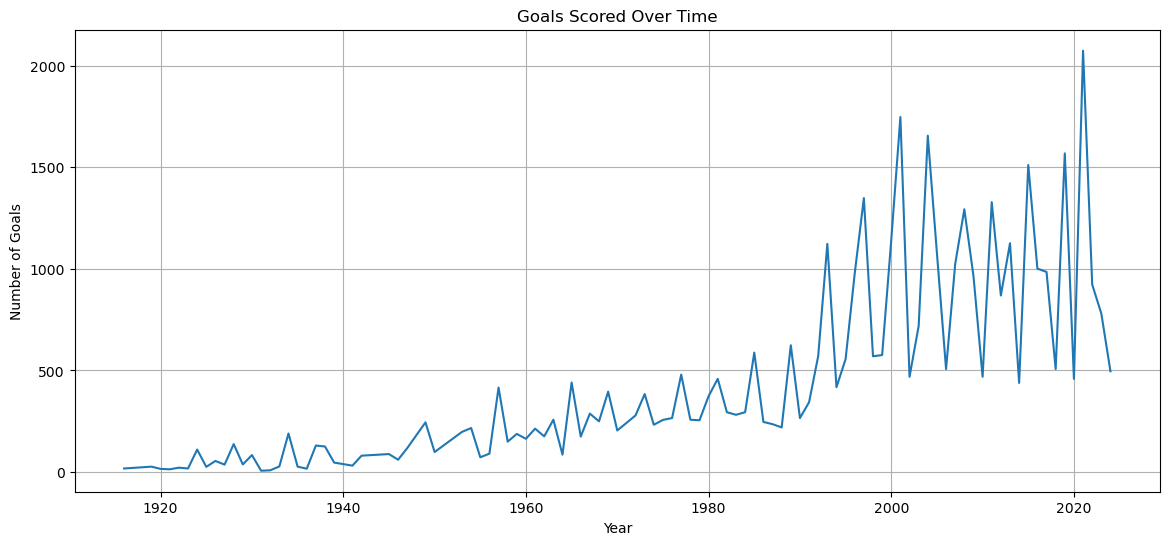

In [127]:
# Distribution the goals according to year
goals_per_year = df['date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x=goals_per_year.index, y=goals_per_year.values)
plt.title('Goals Scored Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid(True)
plt.show()

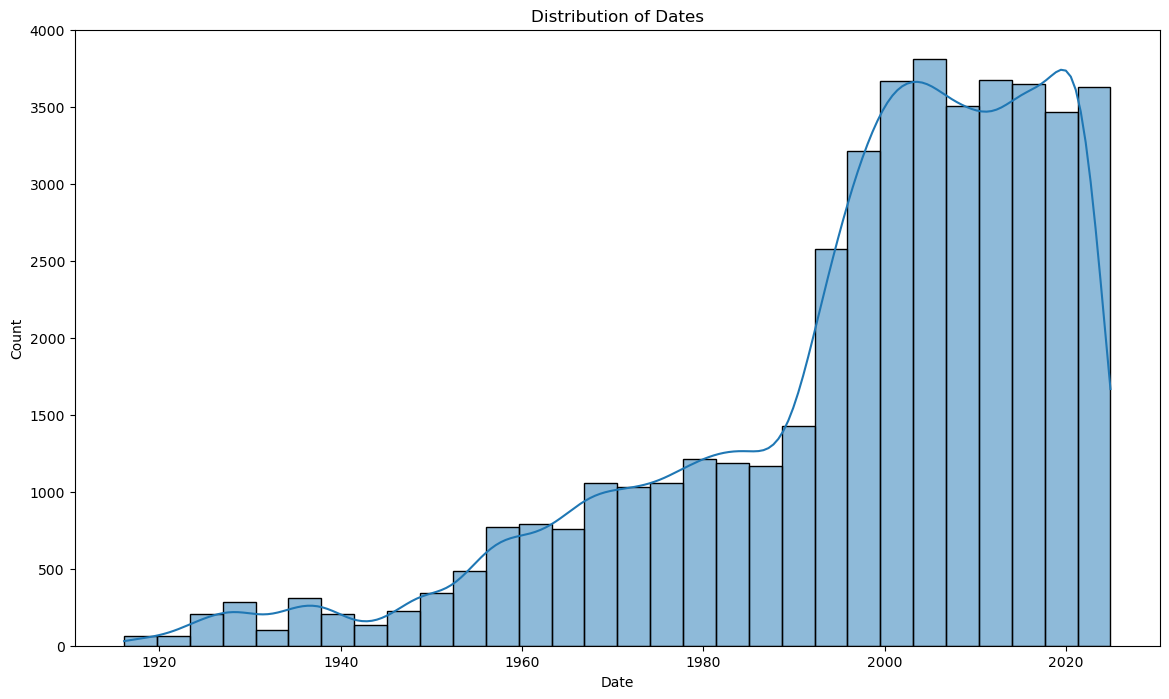

In [128]:
# Visualize the distribution of date (assuming it's datetime)
plt.figure(figsize=(14, 8))
df['date']=pd.to_datetime(df['date'])
sns.histplot(df['date'],bins=30,kde=True)
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

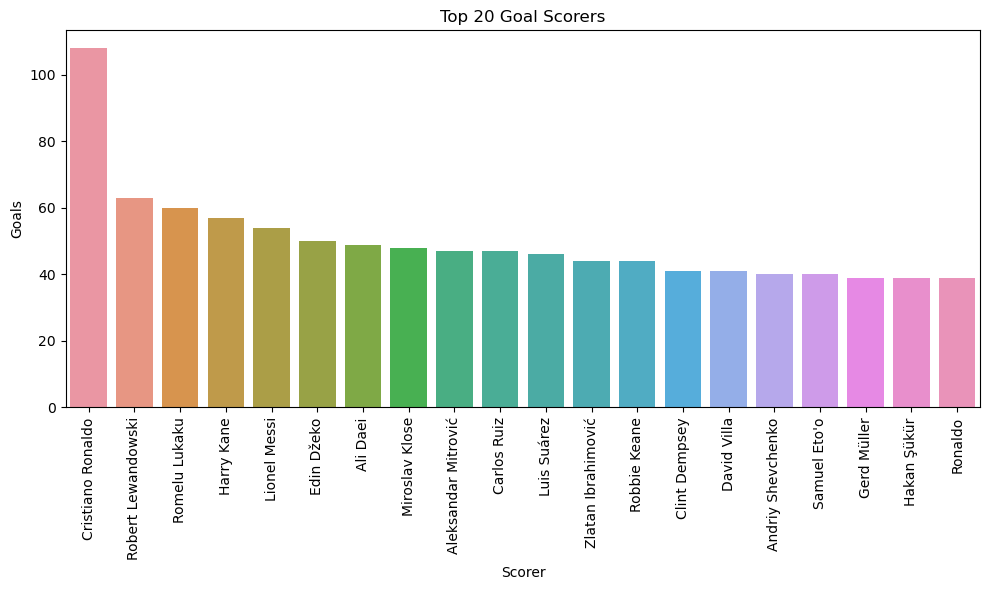

In [129]:
# Top 20 Scorers
top_scorers = df['scorer'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.index, y=top_scorers.values)
plt.title('Top 20 Goal Scorers')
plt.xlabel('Scorer')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Cristiano Ronaldo performs best from all the scorers.

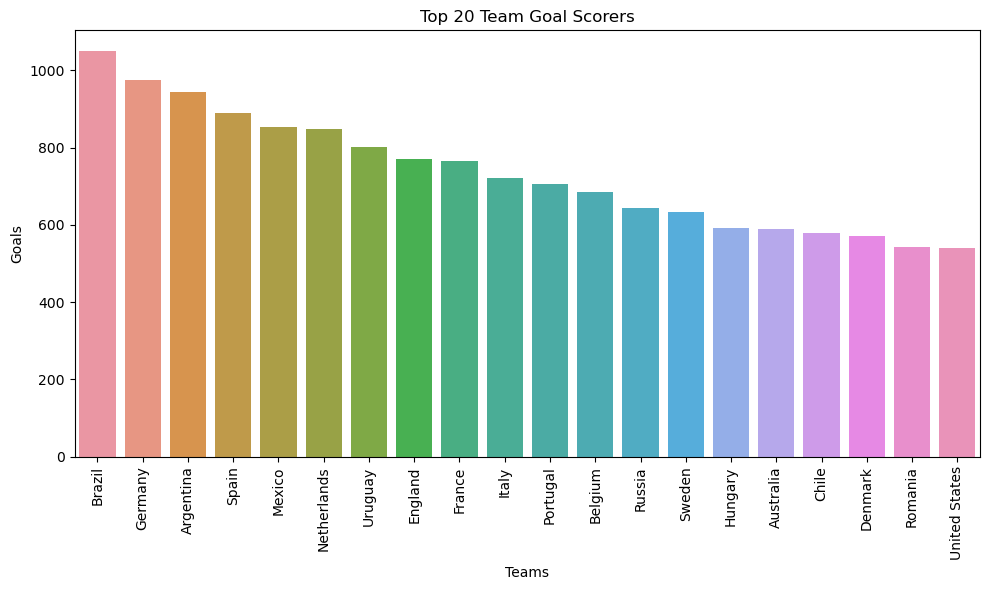

In [130]:
# Goals by Team
goals_by_team = df['team'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=goals_by_team.index, y=goals_by_team.values)
plt.title('Top 20 Team Goal Scorers')
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Team Brazil has scored maximum no. of goals.  

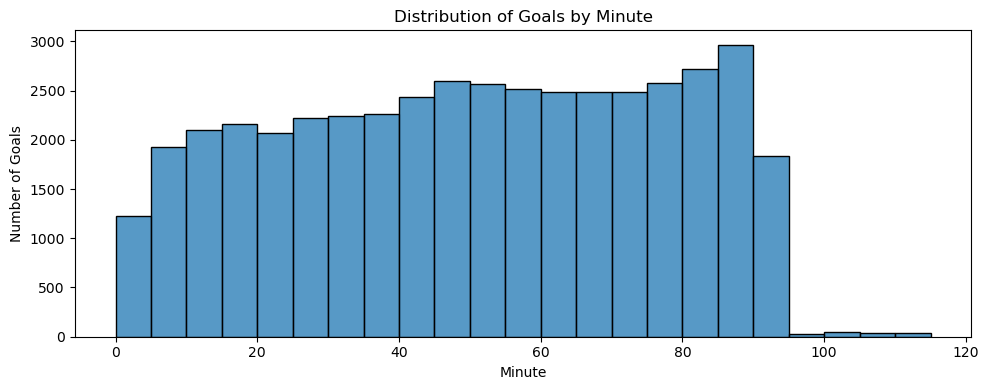

In [131]:
# Distribution of Goals by Minute
plt.figure(figsize=(10, 4))
sns.histplot(df['minute'], bins=range(0, 120, 5))
plt.title('Distribution of Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()

* Above visualization shows that maximum no. of goals done in 2nd half.

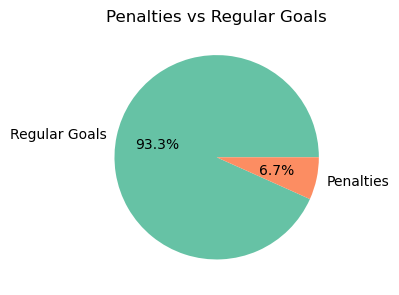

In [132]:
# Penalties vs. Regular Goals
penalties = df['penalty'].value_counts()
penalty_labels = {0: 'Regular Goals', 1: 'Penalties'}
labels = [penalty_labels[x] for x in penalties.index]
plt.figure(figsize=(4, 4))
plt.pie(penalties, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Penalties vs Regular Goals')
plt.tight_layout()
plt.show()

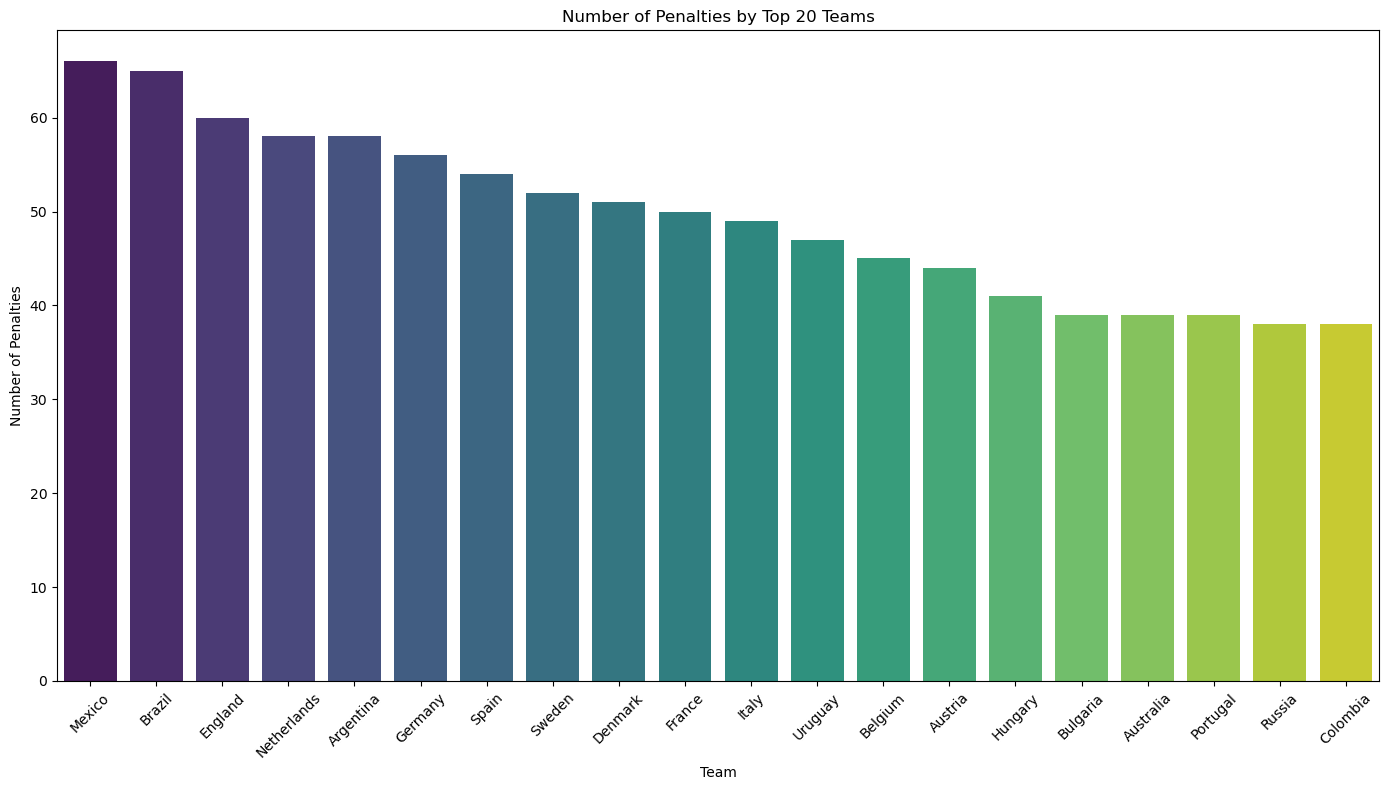

In [133]:
# Count penalties by team
penalties_by_team = df[df['penalty'] == 1].groupby('team').size().sort_values(ascending=False)

# Get the top 20 teams based on penalties
top_20_penalties_by_team = penalties_by_team.head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_penalties_by_team.index, y=top_20_penalties_by_team.values, palette='viridis')
plt.title('Number of Penalties by Top 20 Teams')
plt.xlabel('Team')
plt.ylabel('Number of Penalties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Team Maxico has the record of maximum no . of penalties.

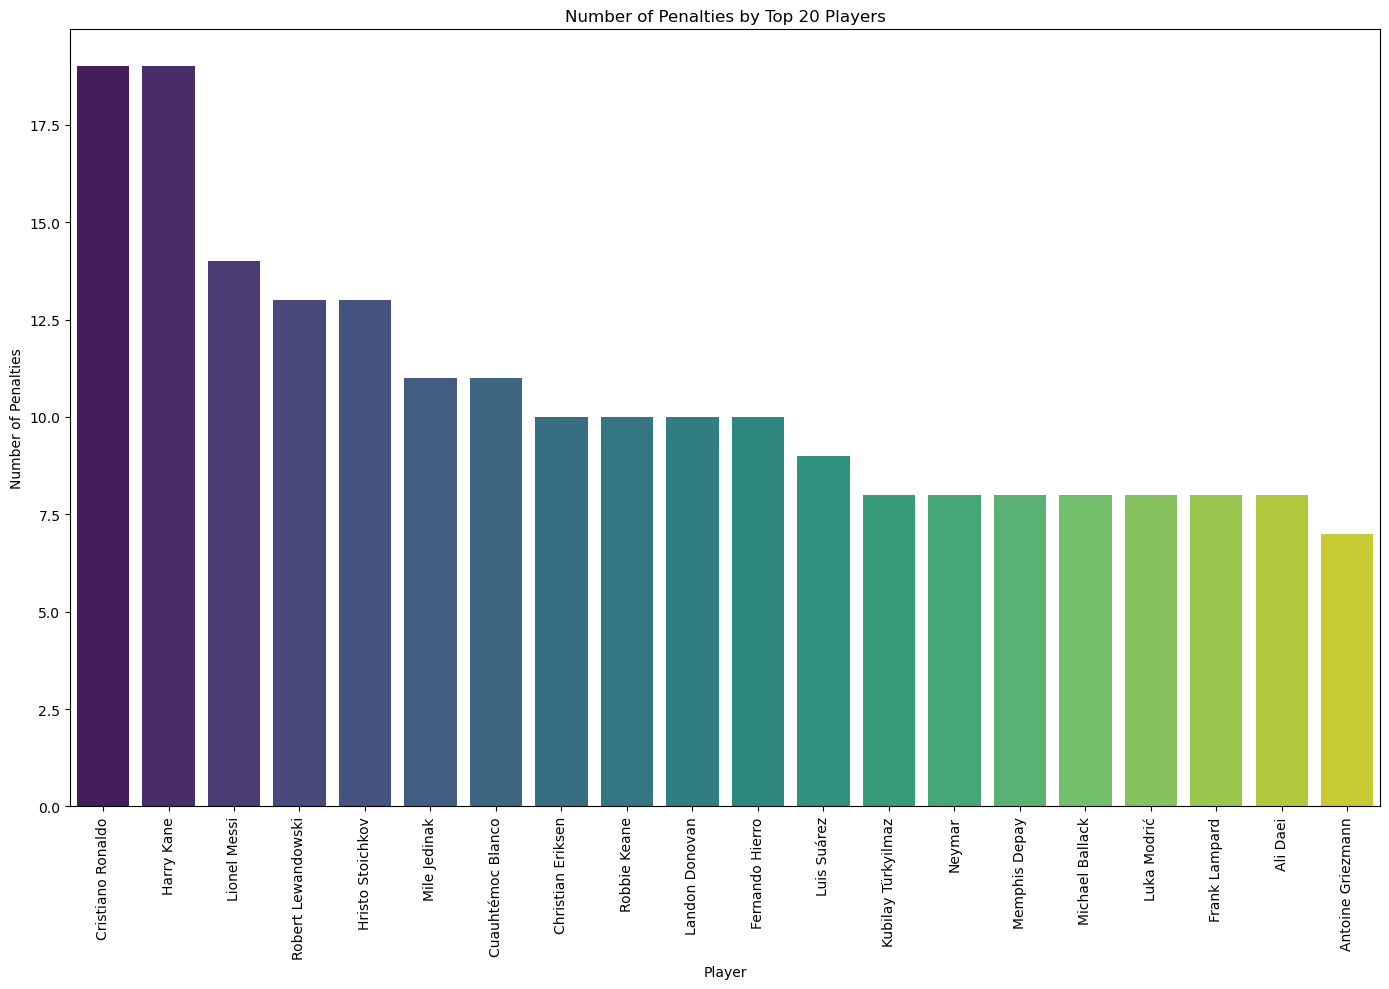

In [134]:
# Count penalties by player
penalties_by_player = df[df['penalty'] == 1].groupby('scorer').size().sort_values(ascending=False)

# Get the top 20 players based on penalties
top_20_penalties_by_player = penalties_by_player.head(20)
plt.figure(figsize=(14, 10))
sns.barplot(x=top_20_penalties_by_player.index, y=top_20_penalties_by_player.values, palette='viridis')
plt.title('Number of Penalties by Top 20 Players')
plt.xlabel('Player')
plt.ylabel('Number of Penalties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Cristiano Ronaldo and Harry Kane got maximum no. of penalties.

Text(0, 0.5, 'Count')

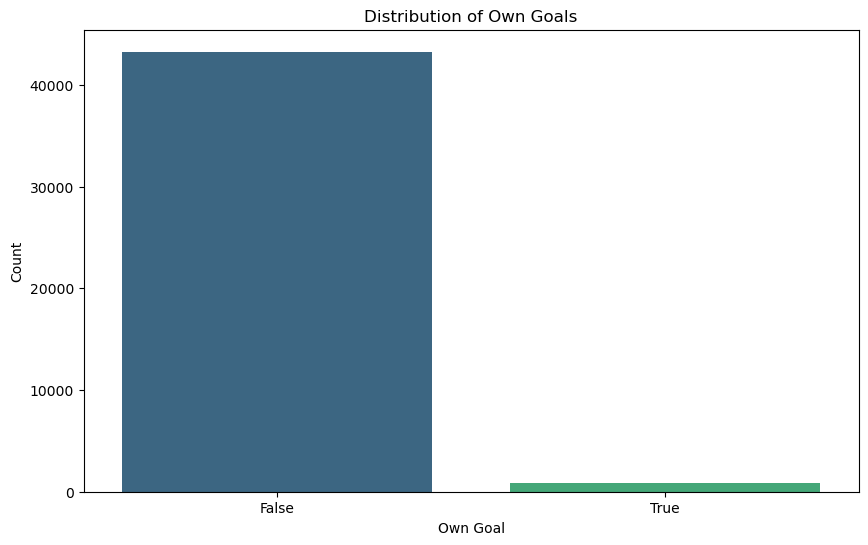

In [135]:
# Own Goals
plt.figure(figsize=(10, 6))
sns.countplot(x='own_goal', data=df, palette='viridis')
plt.title('Distribution of Own Goals')
plt.xlabel('Own Goal')
plt.ylabel('Count')

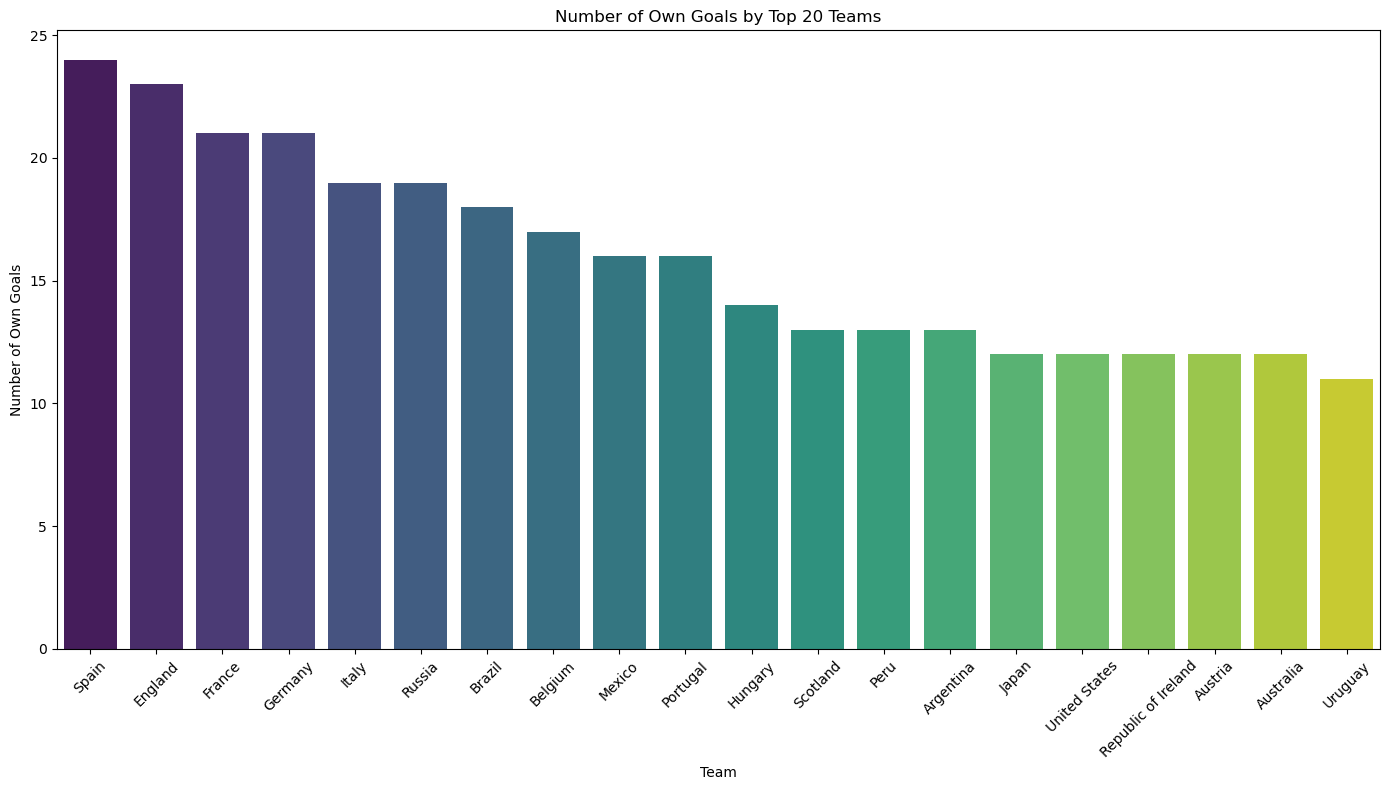

In [136]:
own_goals_by_team = df[df['own_goal'] == 1].groupby('team').size().sort_values(ascending=False)

# Get the top 20 teams based on own goals
top_20_own_goals_by_team = own_goals_by_team.head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_own_goals_by_team.index, y=top_20_own_goals_by_team.values, palette='viridis')
plt.title('Number of Own Goals by Top 20 Teams')
plt.xlabel('Team')
plt.ylabel('Number of Own Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Team Spain did maximum no. of own goals.

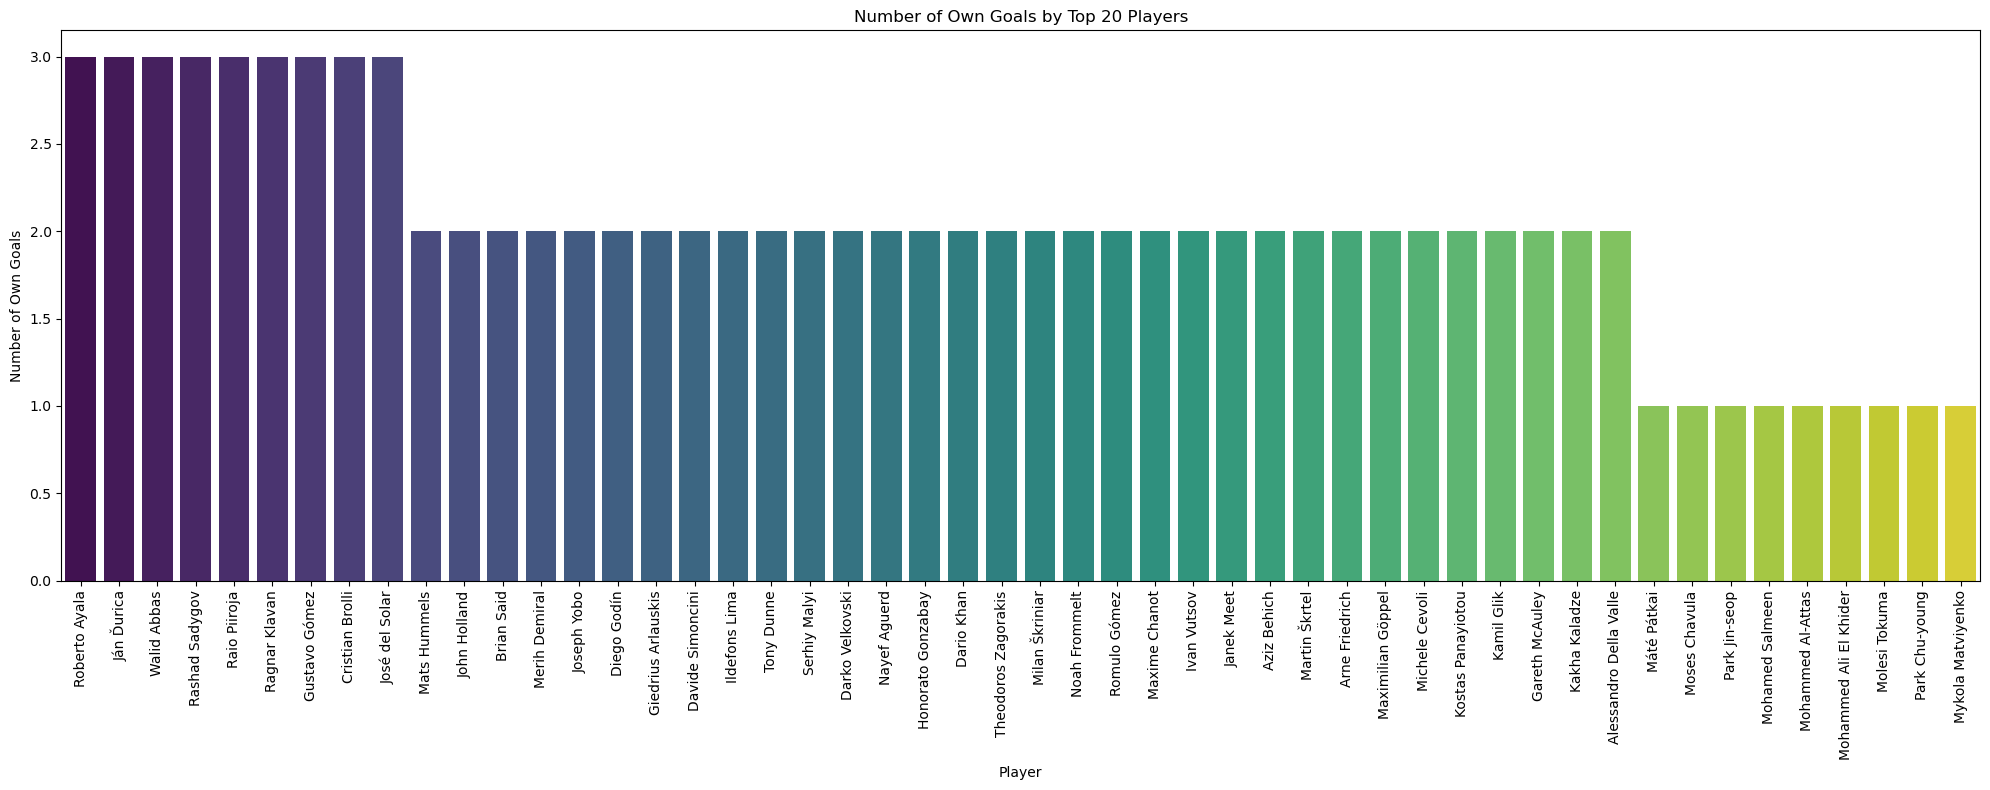

In [137]:
# Count own goals by player
own_goals_by_player = df[df['own_goal'] == 1].groupby('scorer').size().sort_values(ascending=False)

# Get the top 20 players based on own goals
top_20_own_goals_by_player = own_goals_by_player.head(50)
plt.figure(figsize=(20, 8))
sns.barplot(x=top_20_own_goals_by_player.index, y=top_20_own_goals_by_player.values, palette='viridis')
plt.title('Number of Own Goals by Top 20 Players')
plt.xlabel('Player')
plt.ylabel('Number of Own Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

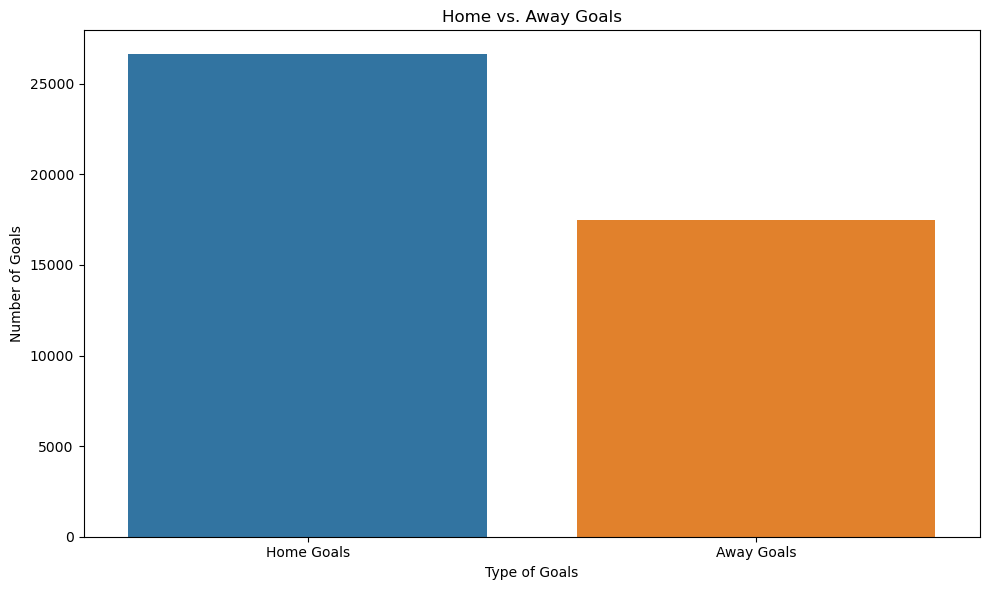

In [138]:
# Distribution of Home Goals vs Away Goals
home_goals = df[df['team'] == df['home_team']].shape[0]
away_goals = df[df['team'] == df['away_team']].shape[0]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Home Goals', 'Away Goals'], y=[home_goals, away_goals])
plt.title('Home vs. Away Goals')
plt.xlabel('Type of Goals')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()

* Maximum No. of goals were achieved by teams in their home countries.

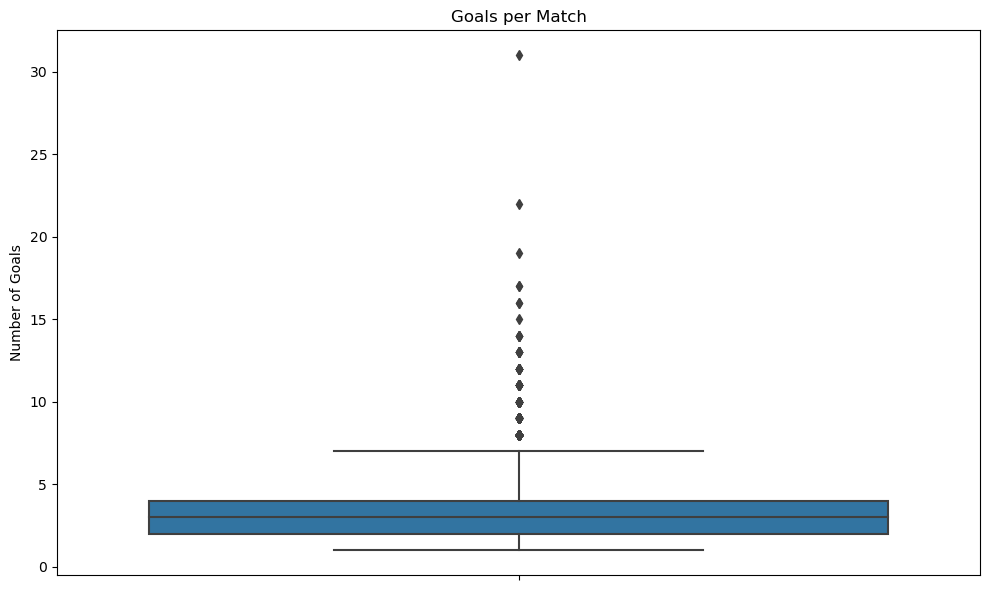

In [139]:
# Goals per Match
goals_per_match = df.groupby(['date', 'home_team', 'away_team']).size()
plt.figure(figsize=(10, 6))
sns.boxplot(y=goals_per_match)
plt.title('Goals per Match')
plt.ylabel('Number of Goals')
plt.tight_layout()
plt.show()

* Highest no. of goals in a match has greater than 30. 
* Average no. of goals of maximum matches has 2 to 4 per match. 

<Figure size 1400x800 with 0 Axes>

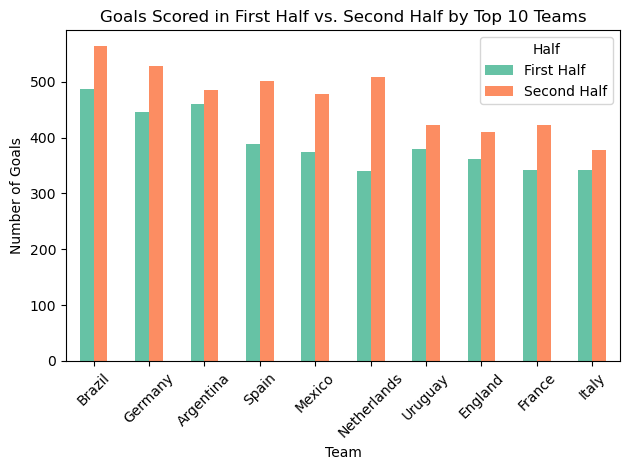

In [140]:
# Categorize goals into 'First Half' and 'Second Half'
df['half'] = df['minute'].apply(lambda x: 'First Half' if x <= 45 else 'Second Half')

# Count goals by team and half
goals_by_half = df.groupby(['team', 'half']).size().unstack().fillna(0)

# Calculate total goals for each team
goals_by_team = goals_by_half.sum(axis=1)

# Get the top 10 teams based on total goals
top_10_teams = goals_by_team.nlargest(10).index

# Filter the data to include only the top 10 teams
top_10_goals_by_half = goals_by_half.loc[top_10_teams]

# Plotting the number of goals in first half vs. second half for the top 10 teams
plt.figure(figsize=(14, 8))
top_10_goals_by_half.plot(kind='bar', color=['#66c2a5', '#fc8d62'])
plt.title('Goals Scored in First Half vs. Second Half by Top 10 Teams')
plt.xlabel('Team')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.legend(title='Half')
plt.tight_layout()
plt.show()

* Team Brazil has the record to goal maximum in 1st half and 2nd half both. 

<Figure size 1400x800 with 0 Axes>

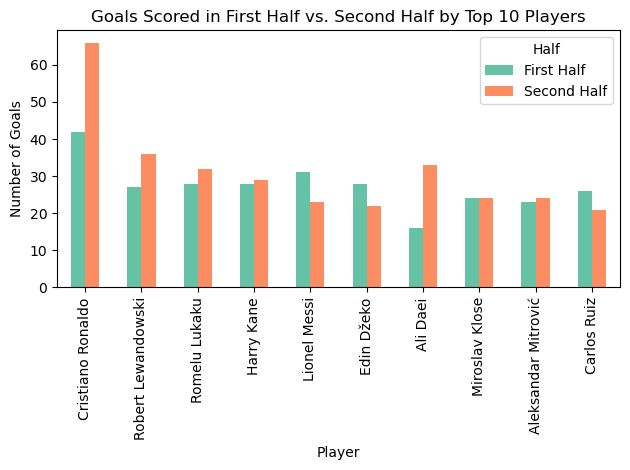

In [141]:
# Categorize goals into 'First Half' and 'Second Half'
df['half'] = df['minute'].apply(lambda x: 'First Half' if x <= 45 else 'Second Half')

# Count goals by player and half
goals_by_half = df.groupby(['scorer', 'half']).size().unstack().fillna(0)

# Calculate total goals for each player
total_goals_by_player = goals_by_half.sum(axis=1)

# Get the top 10 players based on total goals
top_10_players = total_goals_by_player.nlargest(10).index

# Filter the data to include only the top 10 players
top_10_goals_by_half = goals_by_half.loc[top_10_players]

# Plotting the number of goals in the first half vs. second half for the top 10 players
plt.figure(figsize=(14, 8))
top_10_goals_by_half.plot(kind='bar', color=['#66c2a5', '#fc8d62'])
plt.title('Goals Scored in First Half vs. Second Half by Top 10 Players')
plt.xlabel('Player')
plt.ylabel('Number of Goals')
plt.xticks(rotation=90)
plt.legend(title='Half')
plt.tight_layout()
plt.show()

* Cristiano Ronaldo did maximum no. of goals in 1st half and 2nd half both.

In [142]:
# Fetching another Dataset
df1=pd.read_csv("results.csv")
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47381 entries, 0 to 47380
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47381 non-null  object 
 1   home_team   47376 non-null  object 
 2   away_team   47376 non-null  object 
 3   home_score  47370 non-null  float64
 4   away_score  47370 non-null  float64
 5   tournament  47381 non-null  object 
 6   city        47381 non-null  object 
 7   country     47381 non-null  object 
 8   neutral     47381 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [144]:
df1.shape

(47381, 9)

In [145]:
df1.describe()

,home_score,away_score
count,47370.000000,47370.000000
mean,1.759954,1.183154
std,1.775366,1.401821
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [146]:
# checking percentage of null values in the dataset.
round(100*(df1.isnull().sum()/len(df1.index)), 2)

date          0.00
home_team     0.01
away_team     0.01
home_score    0.02
away_score    0.02
tournament    0.00
city          0.00
country       0.00
neutral       0.00
dtype: float64

In [147]:
# Deleting the entries having null values.
df1=df1.dropna()

In [148]:
df1.shape

(47370, 9)

In [149]:
(100 - 100*(len(df1.index)/47381))

0.023216057069291196

There is 0.02% loss of data which will not affect our further analysis.

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47370 entries, 0 to 47369
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47370 non-null  object 
 1   home_team   47370 non-null  object 
 2   away_team   47370 non-null  object 
 3   home_score  47370 non-null  float64
 4   away_score  47370 non-null  float64
 5   tournament  47370 non-null  object 
 6   city        47370 non-null  object 
 7   country     47370 non-null  object 
 8   neutral     47370 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 3.3+ MB


In [151]:
# Create  a new column result
df1['result'] = df1.apply(lambda row: 'Home Win' if row['home_score'] > row['away_score'] else 
                            'Away Win' if row['home_score'] < row['away_score'] else 'Draw', axis=1)

In [152]:
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home Win
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home Win
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home Win


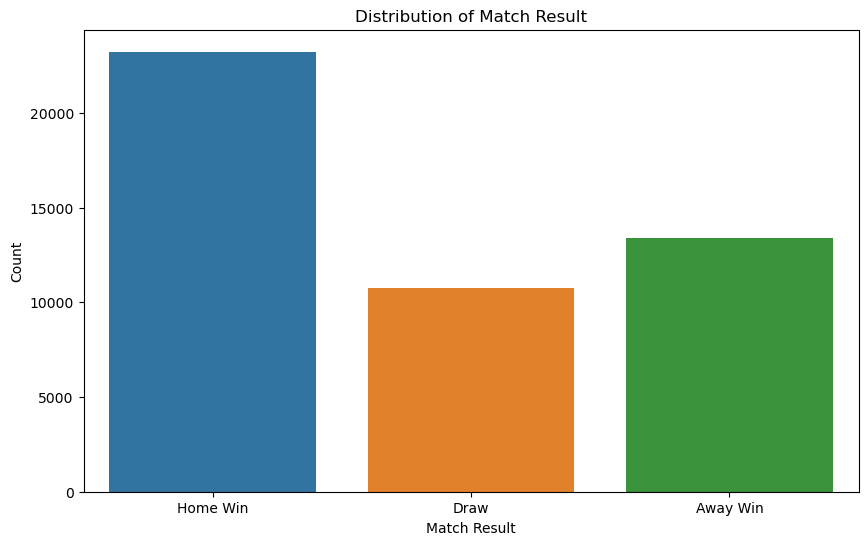

In [153]:
# Plotting distribution of match results
plt.figure(figsize=(10, 6))
sns.countplot(x='result', data=df1, order=['Home Win', 'Draw', 'Away Win'])
plt.title('Distribution of Match Result')
plt.xlabel('Match Result')
plt.ylabel('Count')
plt.show()

* There is maximum no. of wins in home country rather than away country. 

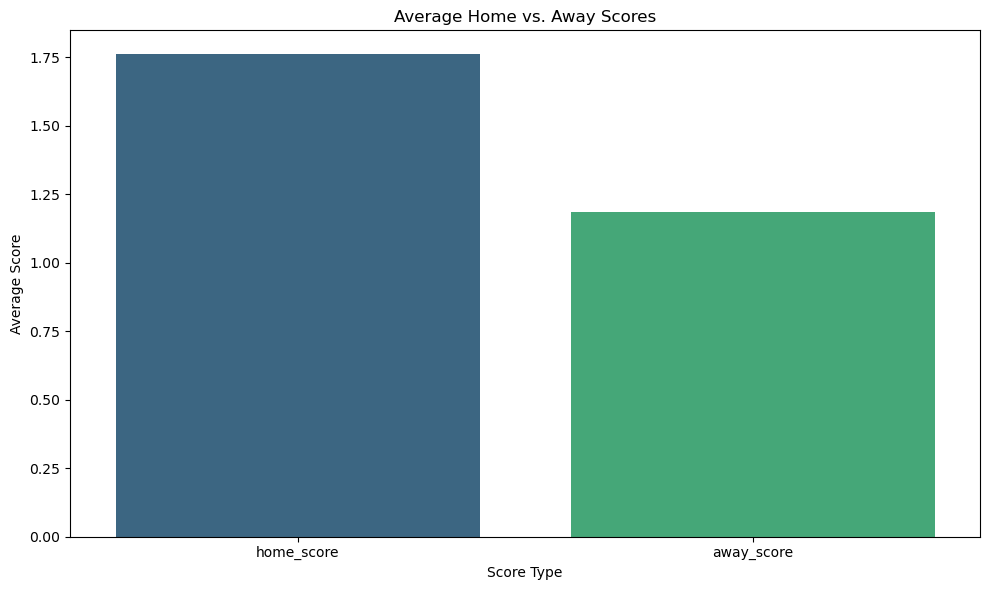

In [154]:
avg_scores = df1[['home_score', 'away_score']].mean().reset_index()
avg_scores.columns = ['score_type', 'average_score']

plt.figure(figsize=(10, 6))
sns.barplot(x='score_type', y='average_score', data=avg_scores, palette='viridis')
plt.title('Average Home vs. Away Scores')
plt.xlabel('Score Type')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

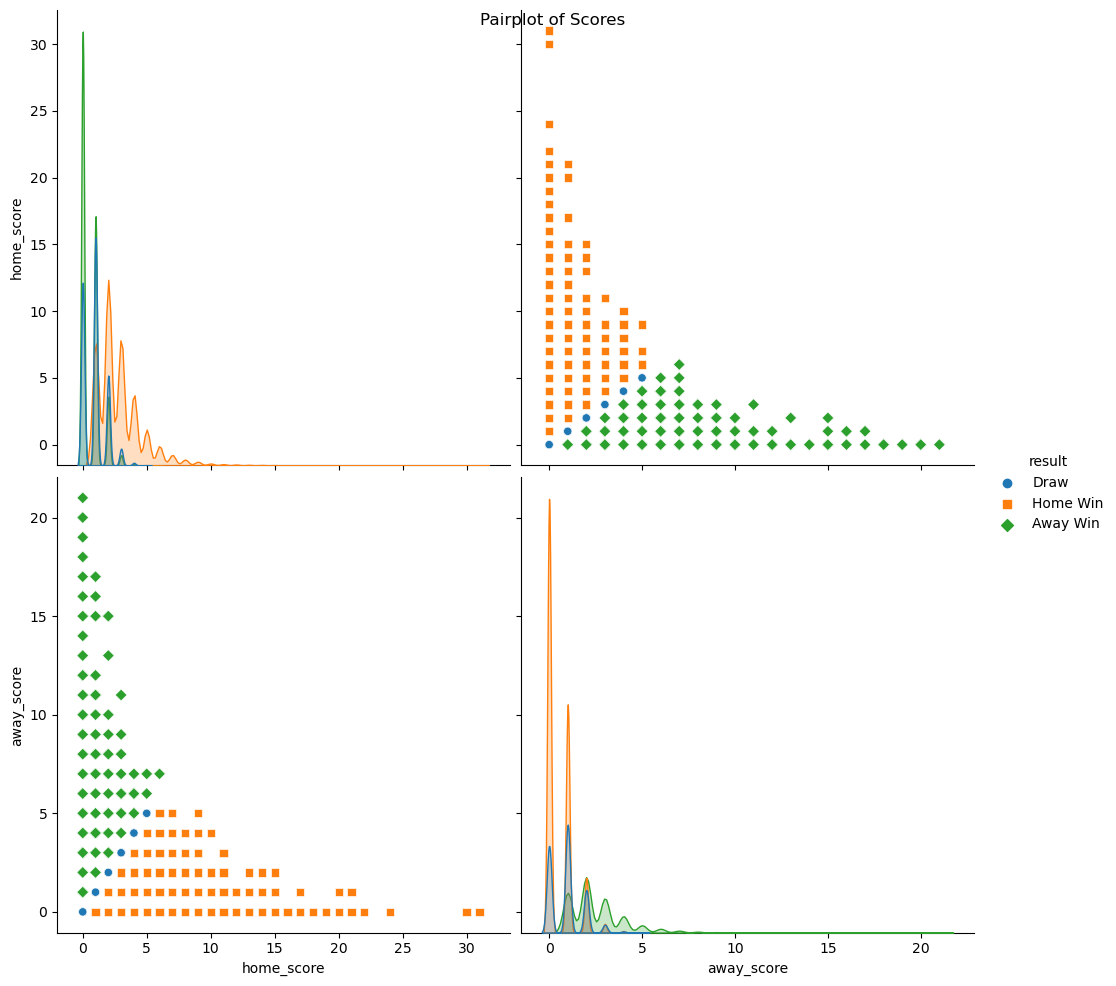

In [155]:
# Plotting distribution of scores
sns.pairplot(df1[['home_score','away_score','result']],hue='result',markers=['o','s','D'],height=5)
plt.suptitle('Pairplot of Scores')
plt.show()

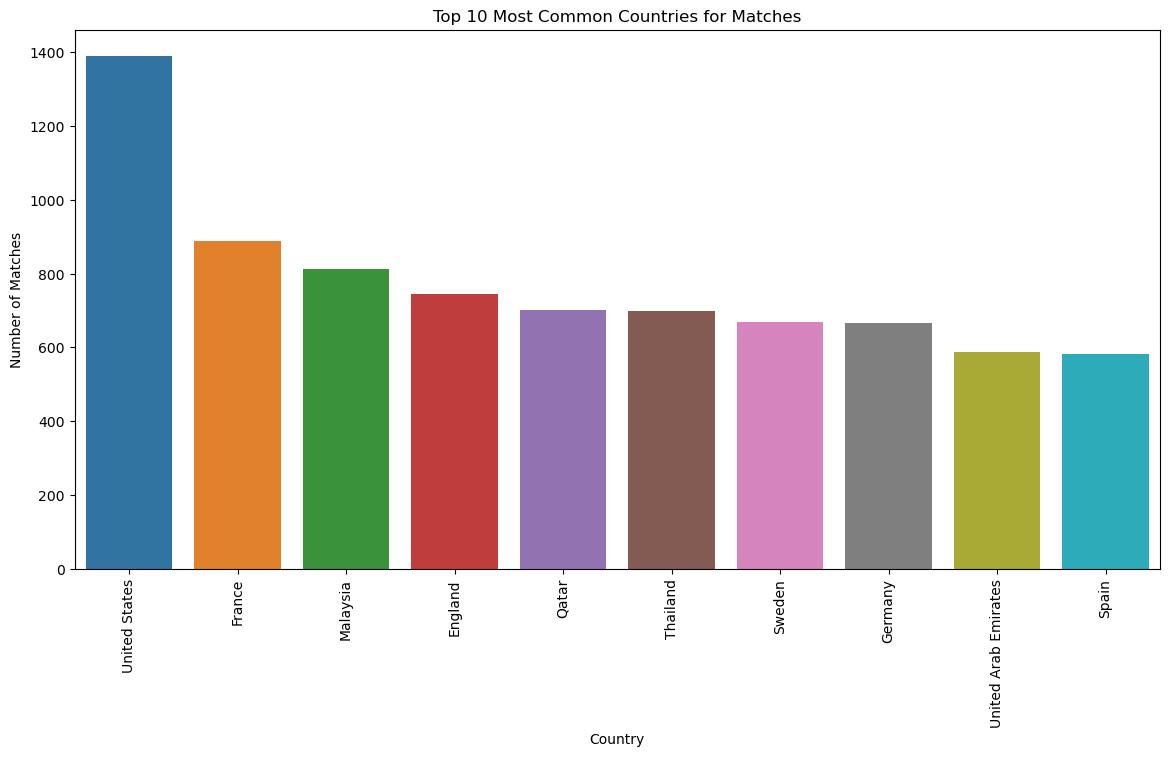

In [156]:
# Geographical Analysis - Countries
plt.figure(figsize=(14, 7))
top_countries = df1['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Most Common Countries for Matches')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

* Maximum no. of matches played in United States.

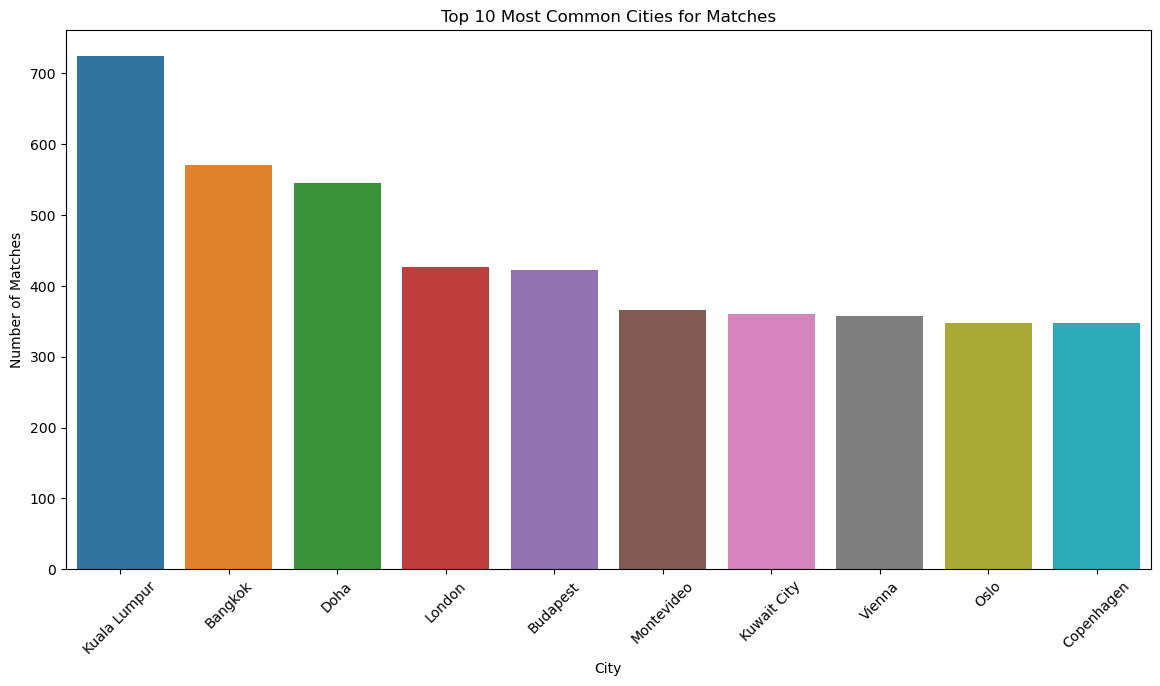

In [157]:
# Geographical Analysis - Cities
plt.figure(figsize=(14, 7))
top_cities = df1['city'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Most Common Cities for Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

* Maximum no. of matches played in Kuala Lumpur city which is greater than 700.

<Figure size 1400x700 with 0 Axes>

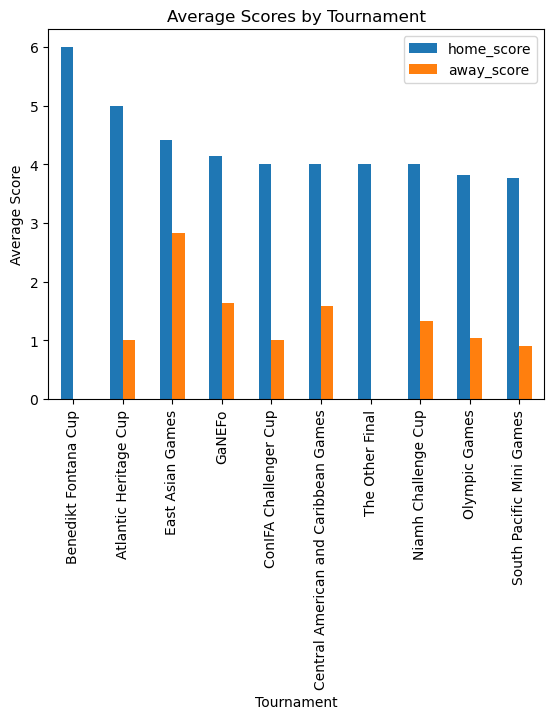

In [158]:
# Average scores by tournament
avg_scores_tournament = df1.groupby('tournament')[['home_score', 'away_score']].mean().sort_values(by='home_score', ascending=False).head(10)
plt.figure(figsize=(14, 7))
avg_scores_tournament.plot(kind='bar', stacked=False)
plt.title('Average Scores by Tournament')
plt.xlabel('Tournament')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

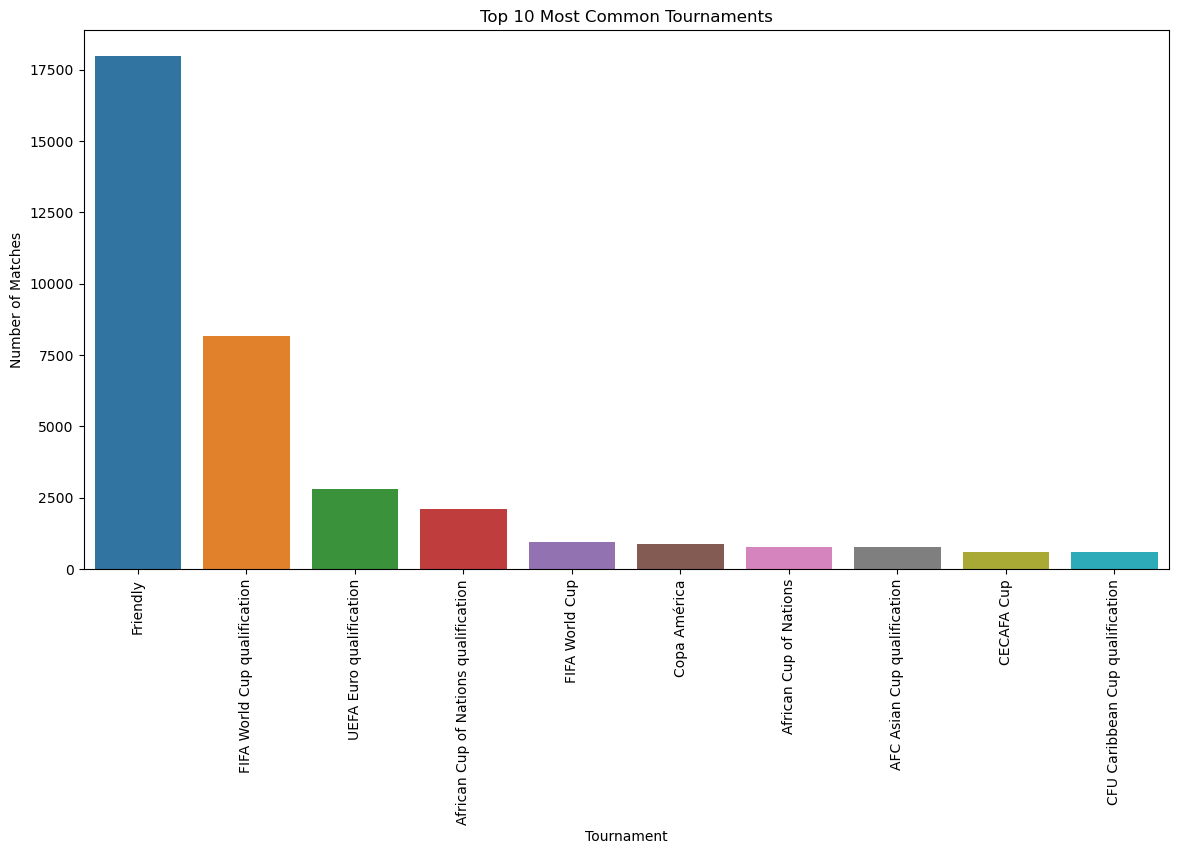

In [159]:
# Tournament Analysis
plt.figure(figsize=(14, 7))
top_tournaments = df1['tournament'].value_counts().head(10)
sns.barplot(x=top_tournaments.index, y=top_tournaments.values)
plt.title('Top 10 Most Common Tournaments')
plt.xlabel('Tournament')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

*Maximum no of matches played friendly. 

<Figure size 1000x600 with 0 Axes>

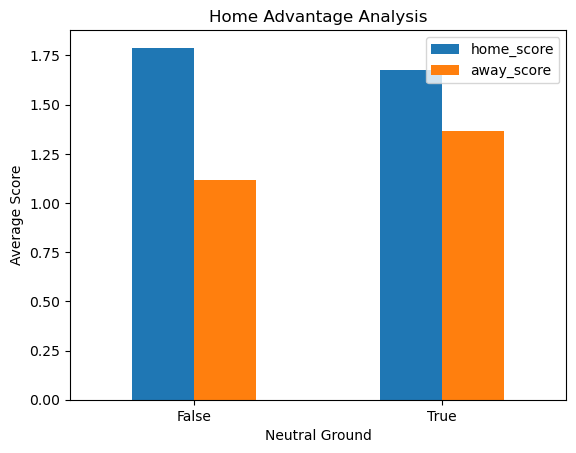

In [160]:
# Home advantage analysis
home_advantage = df1.groupby('neutral')[['home_score', 'away_score']].mean()
plt.figure(figsize=(10, 6))
home_advantage.plot(kind='bar')
plt.title('Home Advantage Analysis')
plt.xlabel('Neutral Ground')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

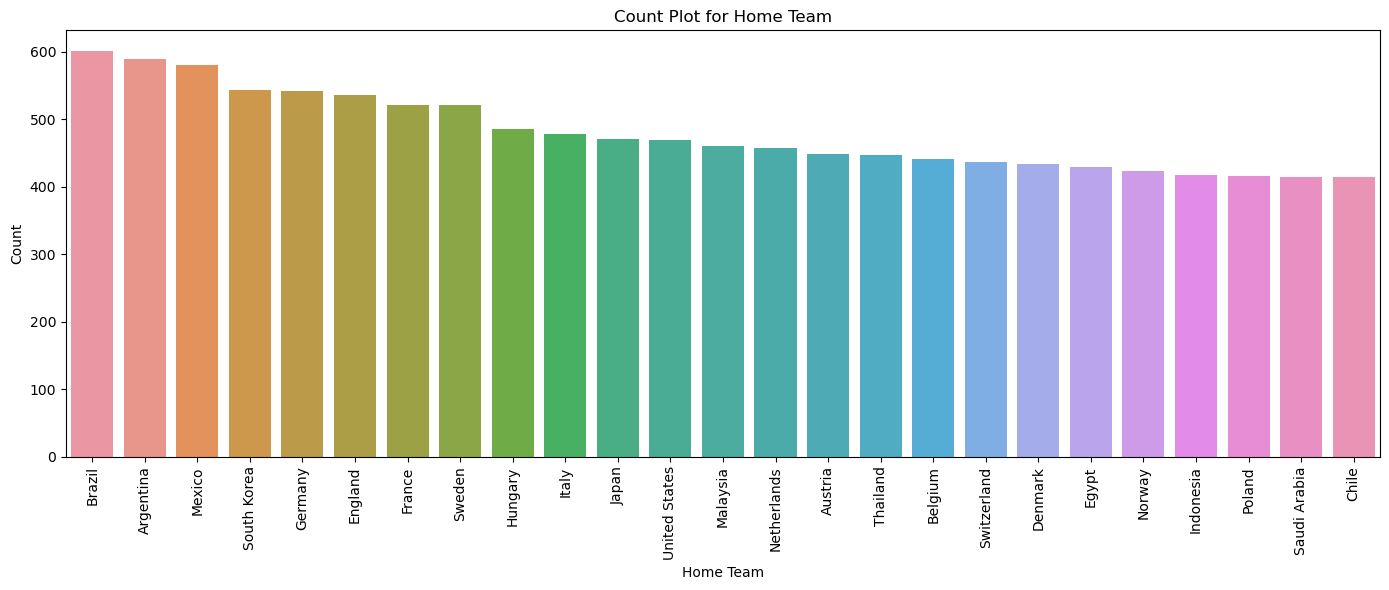

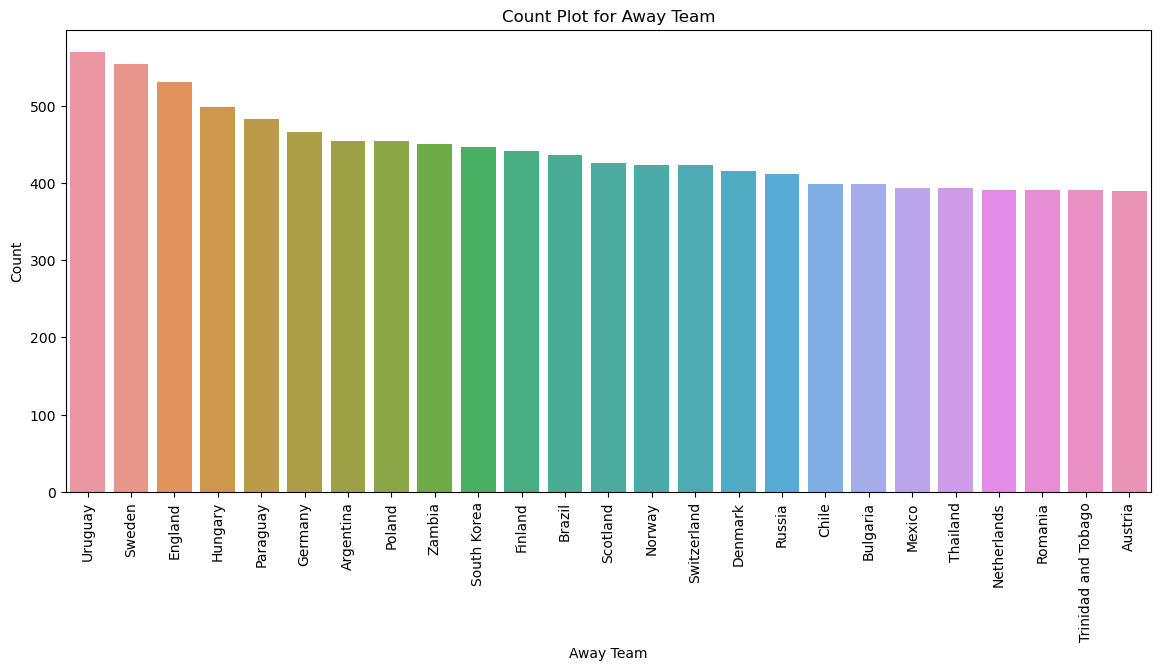

In [161]:
# Plot bar plot for the home_team column
plt.figure(figsize=(14,6))
ax=sns.countplot(x='home_team', data=df1, order=df1['home_team'].value_counts().head(25).index)
plt.title('Count Plot for Home Team')
plt.xlabel('Home Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot bar plot for the away_team column
plt.figure(figsize=(14, 6))
sns.countplot(x='away_team', data=df1, order=df1['away_team'].value_counts().head(25).index)
plt.title('Count Plot for Away Team')
plt.xlabel('Away Team')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [162]:
df1['date'] = pd.to_datetime(df1['date'],format='mixed')

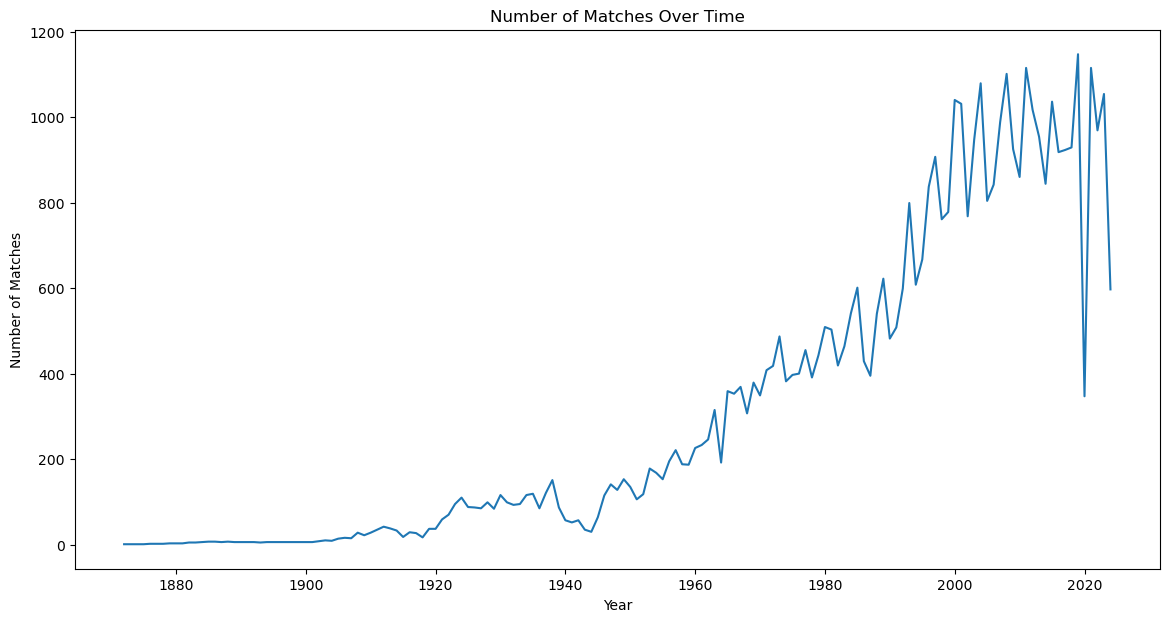

In [163]:
# Plotting number of matches over time
plt.figure(figsize=(14, 7))
df1['year'] = df1['date'].dt.year
matches_per_year = df1.groupby('year').size()
matches_per_year.plot()
plt.title('Number of Matches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

* It is quite clear that no. of matches with respect to year increases over time.

<Figure size 1400x700 with 0 Axes>

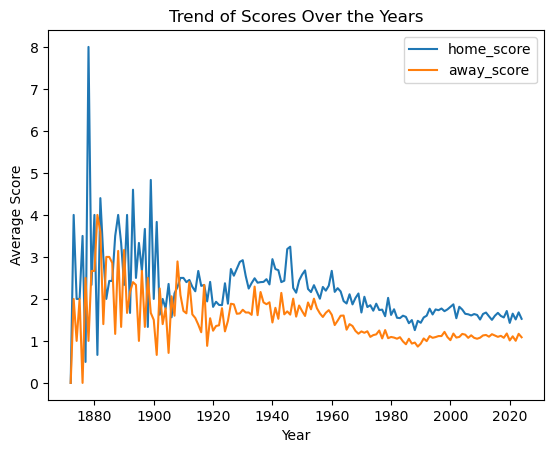

In [164]:
# Trend of scores over the years
plt.figure(figsize=(14, 7))
scores_per_year = df1.groupby('year')[['home_score', 'away_score']].mean()
scores_per_year.plot()
plt.title('Trend of Scores Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

* From this visual it is clear that score of home_team perfroms better than away team but there is average score getting downward w.r.t year onwards.

In [165]:
# fetching another dataset
df2=pd.read_csv("shootouts.csv")
df2.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [166]:
df2.shape

(641, 5)

In [167]:
df2.describe()

,date,home_team,away_team,winner,first_shooter
count,641,641,641,641,227
unique,565,181,189,175,87
top,2016-06-03,South Africa,Uganda,Argentina,Colombia
freq,5,18,15,15,11


In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           641 non-null    object
 1   home_team      641 non-null    object
 2   away_team      641 non-null    object
 3   winner         641 non-null    object
 4   first_shooter  227 non-null    object
dtypes: object(5)
memory usage: 25.2+ KB


In [169]:
#checking percentage of null values in the dataset.
round(100*(df2.isnull().sum()/len(df2.index)), 2)

date              0.00
home_team         0.00
away_team         0.00
winner            0.00
first_shooter    64.59
dtype: float64

In [170]:
# dropping the column first_shooter as the null values greater than 35%
df2=df2.drop("first_shooter" , axis=1)

In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       641 non-null    object
 1   home_team  641 non-null    object
 2   away_team  641 non-null    object
 3   winner     641 non-null    object
dtypes: object(4)
memory usage: 20.2+ KB


In [172]:
# Change the datatype of column Date to datetime64
df2['date'] = pd.to_datetime(df2['date'],format='mixed')

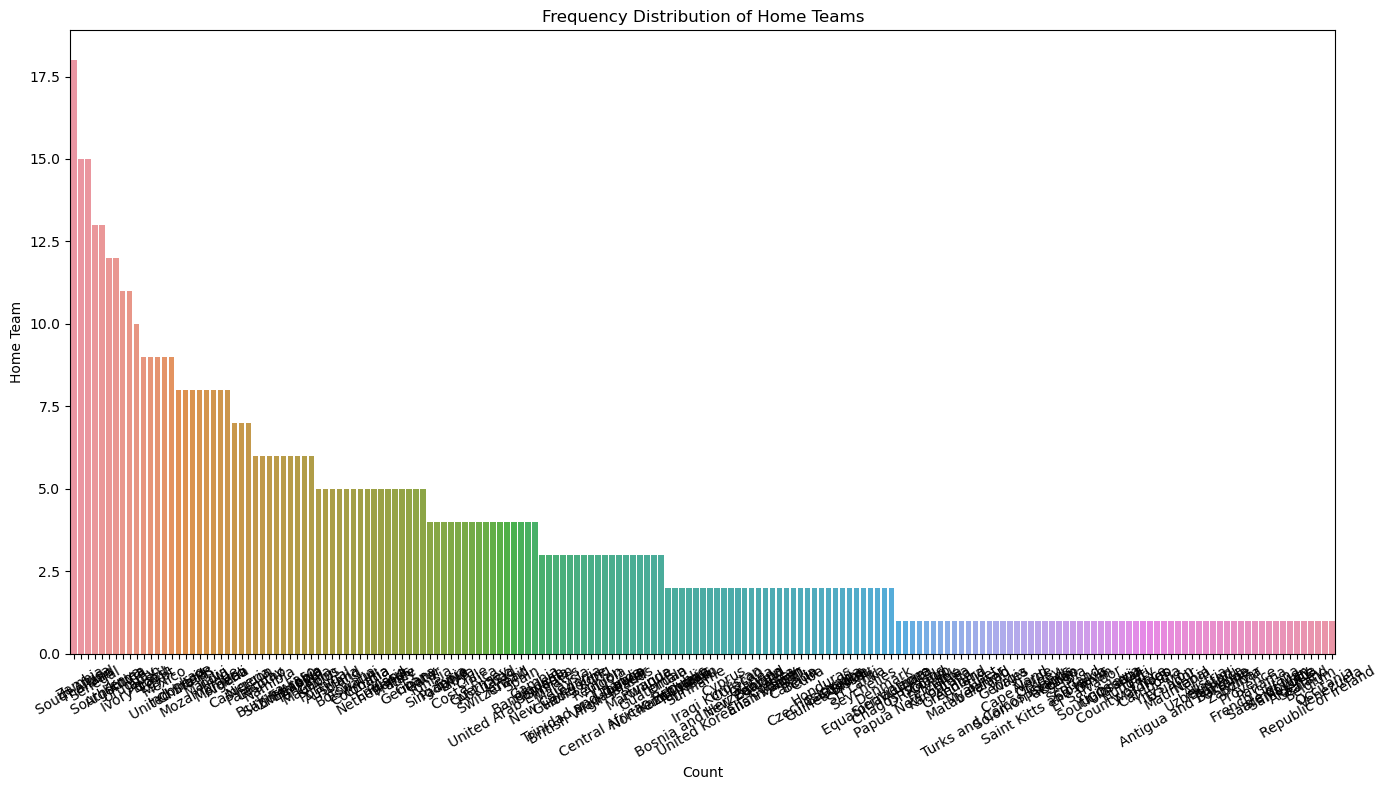

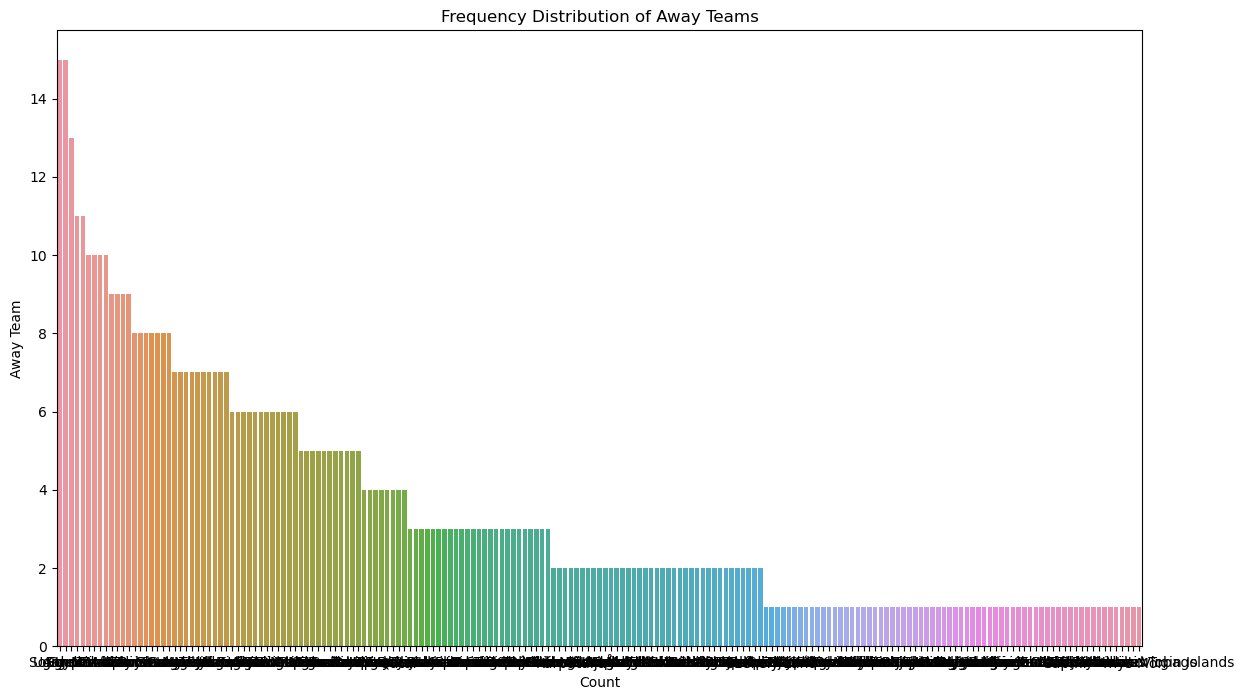

In [173]:
# Home Team vs away team Frequency Distribution

plt.figure(figsize=(14, 8))
sns.countplot(x=df2['home_team'], order=df2['home_team'].value_counts().index)
plt.title('Frequency Distribution of Home Teams')
plt.xlabel('Count')
plt.ylabel('Home Team')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(x=df2['away_team'], order=df2['away_team'].value_counts().index)
plt.title('Frequency Distribution of Away Teams')
plt.xlabel('Count')
plt.ylabel('Away Team')
plt.show()

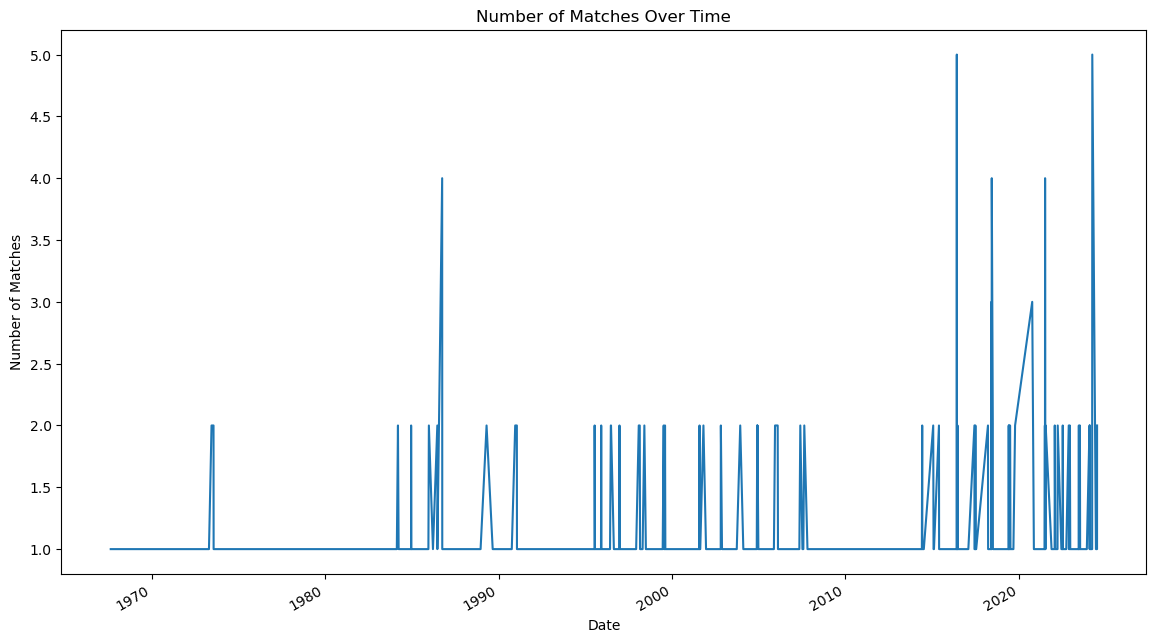

In [174]:


plt.figure(figsize=(14, 8))
df2['date'].value_counts().sort_index().plot()
plt.title('Number of Matches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.show()

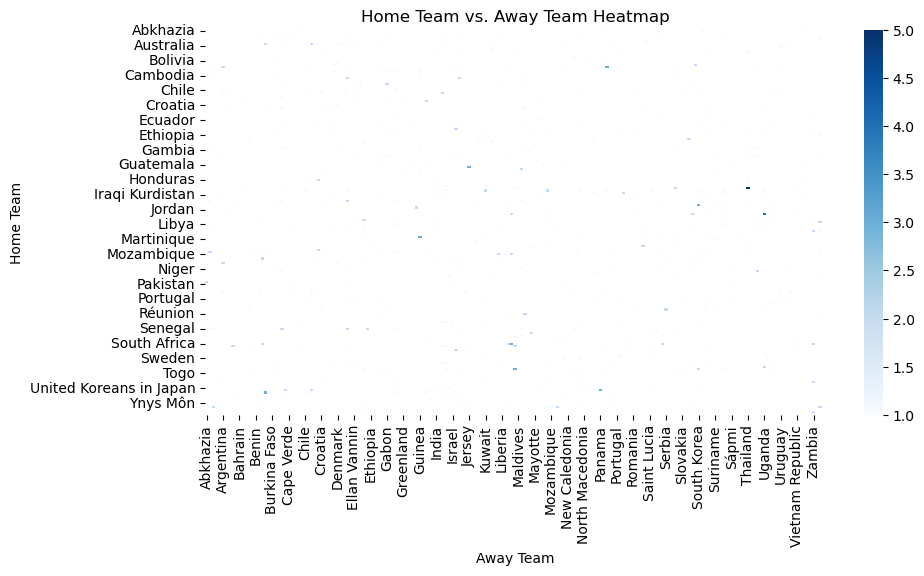

In [175]:
# Home team vs Away Team Heatmap
home_vs_away = df2.groupby(['home_team', 'away_team']).size().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(home_vs_away, cmap="Blues", cbar=True)
plt.title('Home Team vs. Away Team Heatmap')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()

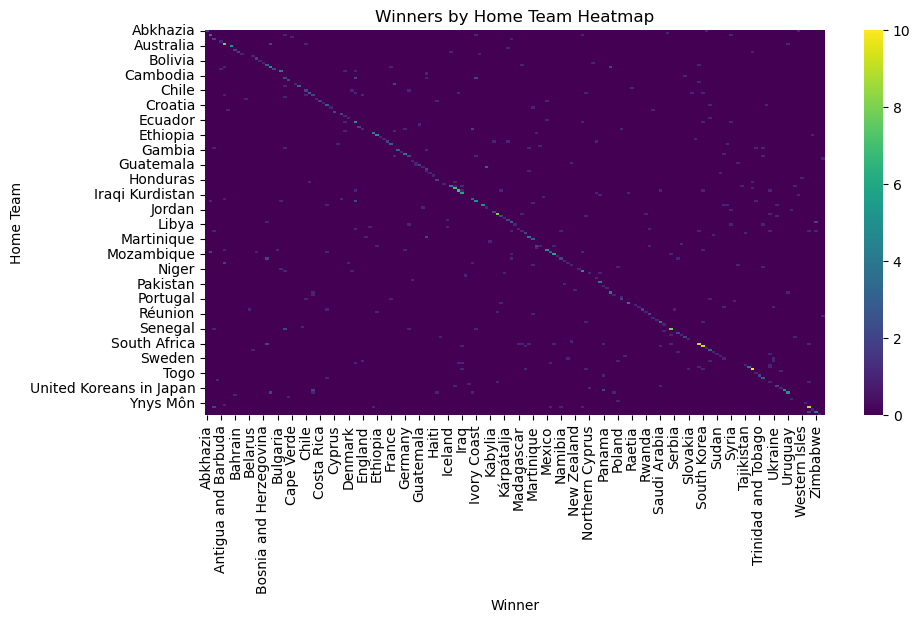

In [176]:
# Winner by hometeam heatmap
plt.figure(figsize=(10,5))
winners_by_home = df2.groupby(['home_team', 'winner']).size().unstack().fillna(0)
sns.heatmap(winners_by_home, cmap="viridis", cbar=True)
plt.title('Winners by Home Team Heatmap')
plt.xlabel('Winner')
plt.ylabel('Home Team')
plt.show()

# Choosing a player after analysis

In [177]:
df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,half
0,1916-02-07,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,First Half
1,1916-02-07,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,Second Half
2,1916-02-07,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,Second Half
3,1916-02-07,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,Second Half
4,1916-06-07,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,First Half


In [178]:
# Filter out own goals for the regular and penalty goals 
regular_goals_df = df[df['own_goal'] == False]

# Count regular goals
regular_goals = regular_goals_df.groupby('scorer').size().reset_index(name='regular_goals')

# Count penalty goals
penalty_goals = regular_goals_df[regular_goals_df['penalty'] == True].groupby('scorer').size().reset_index(name='penalty_goals')

# Count own goals
own_goals = df[df['own_goal'] == True].groupby('scorer').size().reset_index(name='own_goals')

# Merge all counts into a single DataFrame
scorers_aggregated = pd.merge(regular_goals, penalty_goals, on='scorer', how='outer').fillna(0)
scorers_aggregated = pd.merge(scorers_aggregated, own_goals, on='scorer', how='outer').fillna(0)

# Convert counts to integer
scorers_aggregated['regular_goals'] = scorers_aggregated['regular_goals'].astype(int)
scorers_aggregated['penalty_goals'] = scorers_aggregated['penalty_goals'].astype(int)
scorers_aggregated['own_goals'] = scorers_aggregated['own_goals'].astype(int)

# Add total goals column
scorers_aggregated['total_goals'] = scorers_aggregated['regular_goals'] + scorers_aggregated['penalty_goals']

# Sort by total goals
scorers_aggregated = scorers_aggregated.sort_values(by='total_goals', ascending=False)
scorers_aggregated.head(10)
# Display the top 10 goal scorers



,scorer,regular_goals,penalty_goals,own_goals,total_goals
2509,Cristiano Ronaldo,108,19,0,127
4945,Harry Kane,57,19,0,76
10974,Robert Lewandowski,63,13,0,76
7683,Lionel Messi,54,14,0,68
11166,Romelu Lukaku,60,6,0,66
728,Ali Daei,49,8,0,57
7852,Luis Suárez,46,9,0,55
10947,Robbie Keane,44,10,0,54
3284,Edin Džeko,50,2,0,52
2082,Carlos Ruiz,47,4,0,51


Cristiano Ronaldo performs best so we choose him for career analysis.

# Choosing Cristiano Ronaldo for our further analysis

In [179]:
cristiano_df = df[df['scorer'] == 'Cristiano Ronaldo']
cristiano_df.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,half
23831,2004-12-06,Portugal,Greece,Portugal,Cristiano Ronaldo,90.0,False,False,Second Half
24021,2004-06-30,Portugal,Netherlands,Portugal,Cristiano Ronaldo,26.0,False,False,First Half
24303,2004-04-09,Latvia,Portugal,Portugal,Cristiano Ronaldo,57.0,False,False,Second Half
24478,2004-08-09,Portugal,Estonia,Portugal,Cristiano Ronaldo,75.0,False,False,Second Half
24755,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,39.0,False,False,First Half
24757,2004-10-13,Portugal,Russia,Portugal,Cristiano Ronaldo,69.0,False,False,Second Half
24881,2004-11-17,Luxembourg,Portugal,Portugal,Cristiano Ronaldo,28.0,False,False,First Half
25251,2005-04-06,Portugal,Slovakia,Portugal,Cristiano Ronaldo,42.0,False,False,First Half
25342,2005-08-06,Estonia,Portugal,Portugal,Cristiano Ronaldo,32.0,False,False,First Half
26145,2006-06-17,Portugal,Iran,Portugal,Cristiano Ronaldo,80.0,False,True,Second Half


In [180]:
cristiano_df['date'] = pd.to_datetime(cristiano_df['date'],format='mixed')

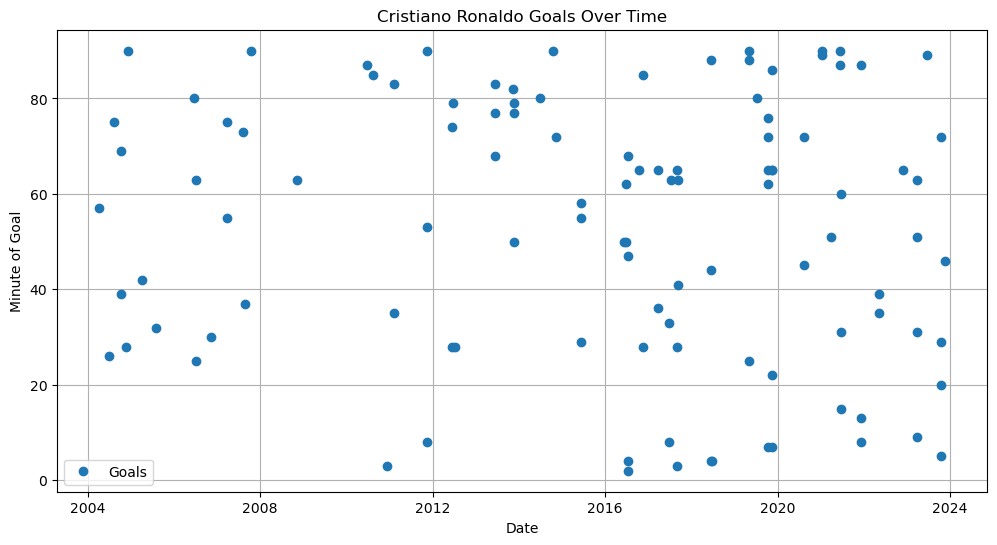

In [181]:
plt.figure(figsize=(12, 6))
plt.plot(cristiano_df['date'], cristiano_df['minute'], 'o', label='Goals')
plt.title('Cristiano Ronaldo Goals Over Time')
plt.xlabel('Date')
plt.ylabel('Minute of Goal')
plt.legend()
plt.grid(True)
plt.show()


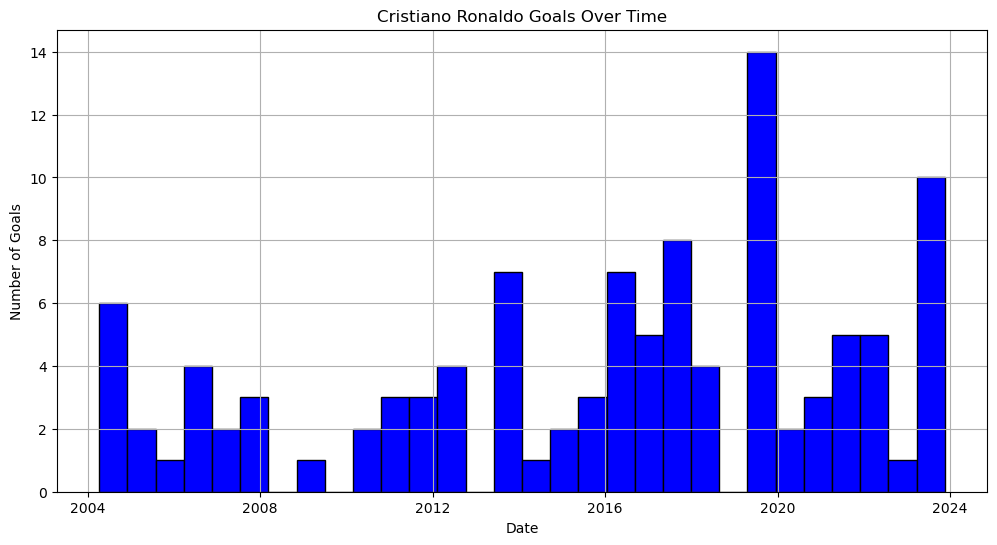

In [182]:
# Plot a histogram of goals scored over time
plt.figure(figsize=(12, 6))
plt.hist(cristiano_df['date'], bins=30, edgecolor='black', color='blue')
plt.title('Cristiano Ronaldo Goals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Goals')
plt.grid(True)
plt.show()

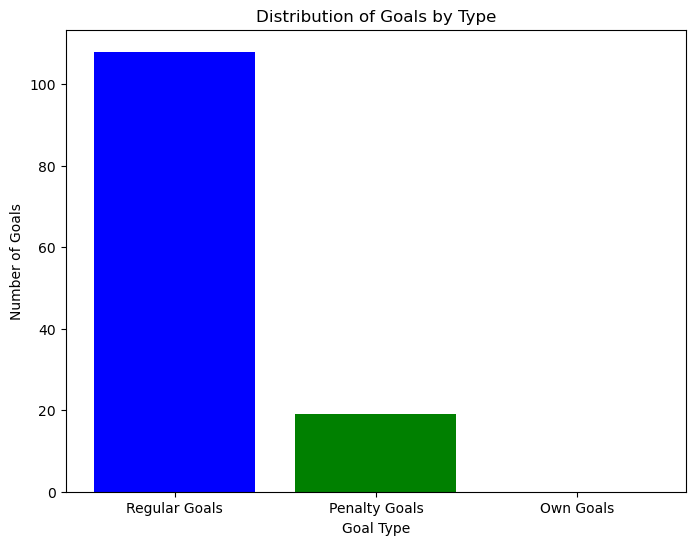

In [183]:
# Plot distribution of goals by type
goal_types = ['Regular Goals', 'Penalty Goals', 'Own Goals']
goal_counts = [108, 19, 0]

plt.figure(figsize=(8, 6))
plt.bar(goal_types, goal_counts, color=['blue', 'green', 'red'])
plt.title('Distribution of Goals by Type')
plt.xlabel('Goal Type')
plt.ylabel('Number of Goals')
plt.show()


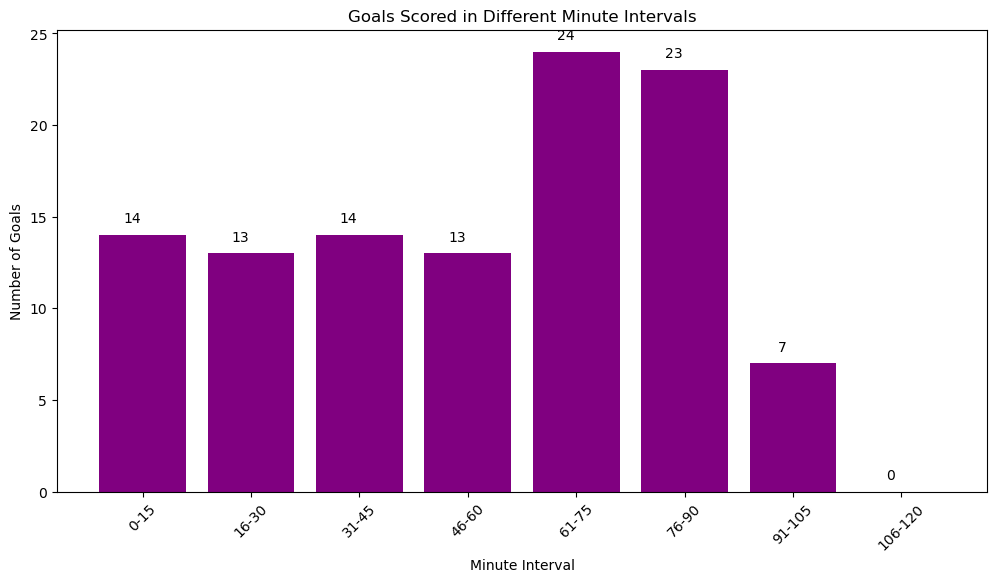

In [184]:
# Plot goals scored in different minute intervals
minute_bins = [0, 15, 30, 45, 60, 75, 90, 105, 120]
minute_labels = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '91-105', '106-120']
cristiano_df['minute_interval'] = pd.cut(cristiano_df['minute'], bins=minute_bins, labels=minute_labels, right=False)

minute_distribution = cristiano_df['minute_interval'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(minute_distribution.index, minute_distribution.values, color='purple')
plt.title('Goals Scored in Different Minute Intervals')
plt.xlabel('Minute Interval')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)

# Annotate bars with goal counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, int(yval), ha='center', va='bottom', color='black')

plt.show()

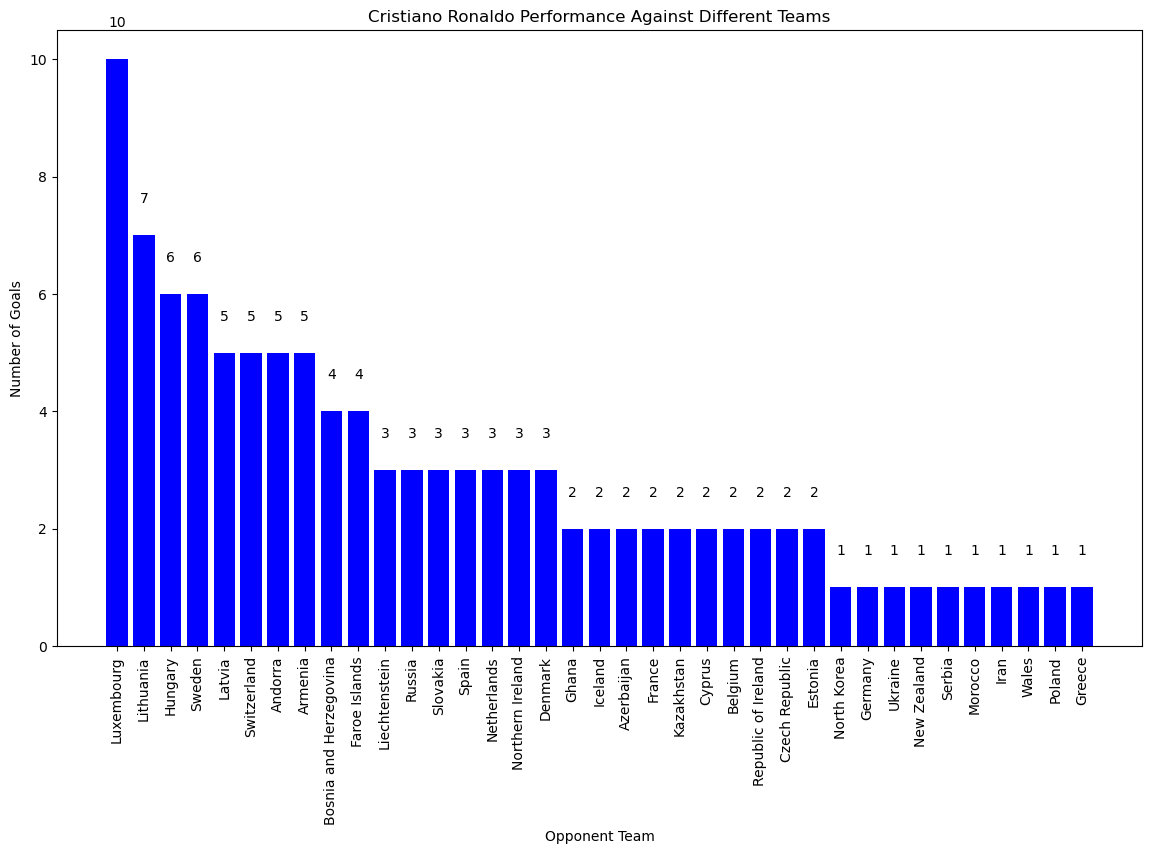

In [185]:
# Identify opponent teams
cristiano_df['opponent'] = cristiano_df.apply(
    lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1
)

# Group by opponent team and count the goals
team_performance = cristiano_df['opponent'].value_counts().sort_values(ascending=False)

# Plot the performance against different teams
plt.figure(figsize=(14, 8))
bars = plt.bar(team_performance.index, team_performance.values, color='blue')
plt.title('Cristiano Ronaldo Performance Against Different Teams')
plt.xlabel('Opponent Team')
plt.ylabel('Number of Goals')
plt.xticks(rotation=90)

# Annotate bars with goal counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', color='black')

plt.show()

Career Analysis of Cristiano Ronaldo:
1. Player did maximum no. of goals against Luxembourg i.e. 10
2. Player scored maximum no. of goals in between 61-75th minute of 2nd half.
3. Player performance is better in 2nd half.
4. Player did maximum no. of goals between 2019 to 2020.
5. Player did maximum no. of penalties i.e. 19
6. Player did total no. of 108 goals.